In [5]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to select and upload your file

Saving SA Growth - Sheet2.csv to SA Growth - Sheet2 (1).csv


In [7]:
import pandas as pd

LB_df = pd.read_csv('SA Growth - Sheet2.csv')
print(LB_df.head(7))


   LB     0        12        24        36         48        60         72
0  R1  13.0    750.00  5,865.00  5,380.00  10,133.33  3,850.00   2,300.00
1  R2   9.0    635.00  2,580.00  3,596.67   2,300.00  2,300.00   2,950.00
2  R3   9.0  4,920.00  4,220.00  1,916.67   3,500.00  3,000.00   3,100.00
3  R4   NaN    500.00    500.00    860.00   5,233.33  4,433.33   1,150.00
4  R5   NaN  1,750.00  2,670.00  1,300.00   1,000.00  2,400.00  11,200.00
5  R6   NaN  1,610.00  3,150.00  1,510.00   4,466.67  5,100.00   1,550.00


In [8]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to select and upload your file
import pandas as pd

HS_df = pd.read_csv('SA Growth - Sheet3.csv')
print(HS_df.head(7))


Saving SA Growth - Sheet3.csv to SA Growth - Sheet3 (1).csv
   HS     0   12   24           36           48           60           72
0  R1   5.0  140   60  1092.666667  2636.666667  2883.333333  4040.000000
1  R2   9.0  515  175    59.000000  1356.666667  4550.000000  3050.000000
2  R3  21.0  175  215  1483.000000  1456.666667  3136.666667  4250.000000
3  R4   NaN  500  500   431.000000  3220.000000   340.000000  2050.000000
4  R5   NaN  435   90  1481.333333  3465.000000  3566.666667  2873.333333
5  R6   NaN  470  215   333.500000  1055.000000  2900.000000  2595.000000


<ipython-input-18-608e430b0b0c>:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(data_io, delim_whitespace=True, index_col=1)


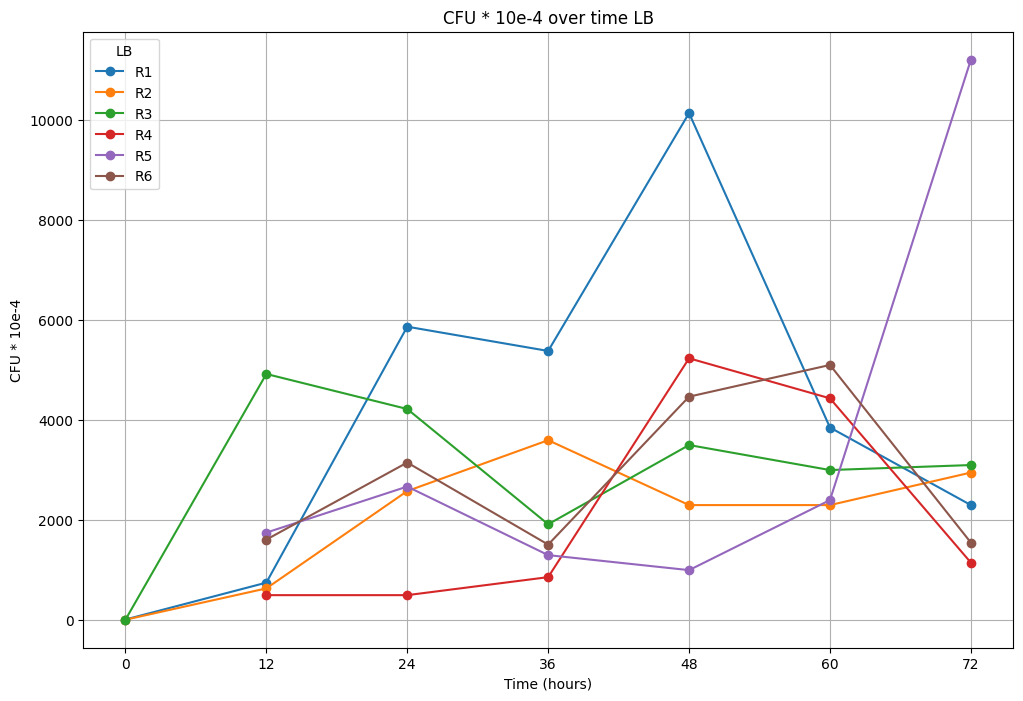

In [18]:
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt

# Paste your data as a string
data = '''LB     0        12        24        36         48        60         72
0  R1  13.0    750.00  5,865.00  5,380.00  10,133.33  3,850.00   2,300.00
1  R2   9.0    635.00  2,580.00  3,596.67   2,300.00  2,300.00   2,950.00
2  R3   9.0  4,920.00  4,220.00  1,916.67   3,500.00  3,000.00   3,100.00
3  R4   NaN    500.00    500.00    860.00   5,233.33  4,433.33   1,150.00
4  R5   NaN  1,750.00  2,670.00  1,300.00   1,000.00  2,400.00  11,200.00
5  R6   NaN  1,610.00  3,150.00  1,510.00   4,466.67  5,100.00   1,550.00'''

# Clean and read data
cleaned_data = data.replace(",", "")
data_io = StringIO(cleaned_data)
df = pd.read_csv(data_io, delim_whitespace=True, index_col=1)

# Plot
plt.figure(figsize=(12, 8))
for idx, row in df.iterrows():
    plt.plot(df.columns[1:], row[1:], marker='o', label=idx)
plt.xlabel('Time (hours)')
plt.ylabel('CFU * 10e-4')
plt.title('CFU * 10e-4 over time LB')
plt.legend(title='LB')
plt.grid(True)
plt.savefig("LB_allreplicates.png")
plt.show()



<ipython-input-19-531ebe1b5ecf>:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(data_io, delim_whitespace=True, index_col=1)


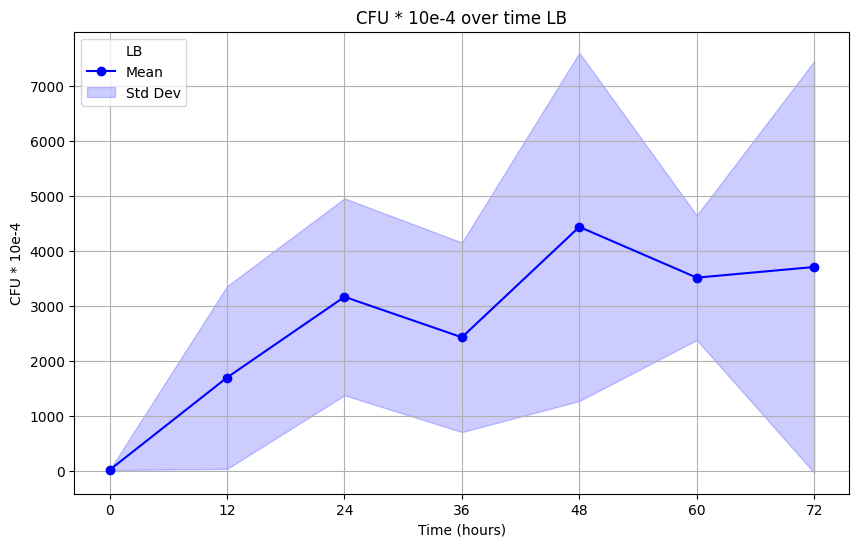

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# Your cleaned data string (as before)
data = '''LB     0        12        24        36         48        60         72
0  R1  13.0    750.00  5,865.00  5,380.00  10,133.33  3,850.00   2,300.00
1  R2   9.0    635.00  2,580.00  3,596.67   2,300.00  2,300.00   2,950.00
2  R3   9.0  4,920.00  4,220.00  1,916.67   3,500.00  3,000.00   3,100.00
3  R4   NaN    500.00    500.00    860.00   5,233.33  4,433.33   1,150.00
4  R5   NaN  1,750.00  2,670.00  1,300.00   1,000.00  2,400.00  11,200.00
5  R6   NaN  1,610.00  3,150.00  1,510.00   4,466.67  5,100.00   1,550.00'''

# Clean and load the data
cleaned_data = data.replace(",", "")
data_io = StringIO(cleaned_data)
df = pd.read_csv(data_io, delim_whitespace=True, index_col=1)
df = df.drop(columns=['LB'])  # Drop the index column if not needed

# Convert all data to numeric, ignore errors
df = df.apply(pd.to_numeric, errors='coerce')

# Calculate mean and standard deviation across replicates
mean_vals = df.mean(axis=0)
std_vals = df.std(axis=0)

# Plot mean ± std
plt.figure(figsize=(10, 6))
plt.plot(mean_vals.index, mean_vals.values, marker='o', color='b', label='Mean')
plt.fill_between(mean_vals.index, mean_vals - std_vals, mean_vals + std_vals,
                 color='b', alpha=0.2, label='Std Dev')
plt.xlabel('Time (hours)')
plt.ylabel('CFU * 10e-4')
plt.title('CFU * 10e-4 over time LB')
plt.legend(title='LB')
plt.grid(True)
plt.savefig("LB_allreplicates_mean_sd.png")
plt.show()


<ipython-input-20-fc0080fc3a6f>:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(data_io, delim_whitespace=True, index_col=1)


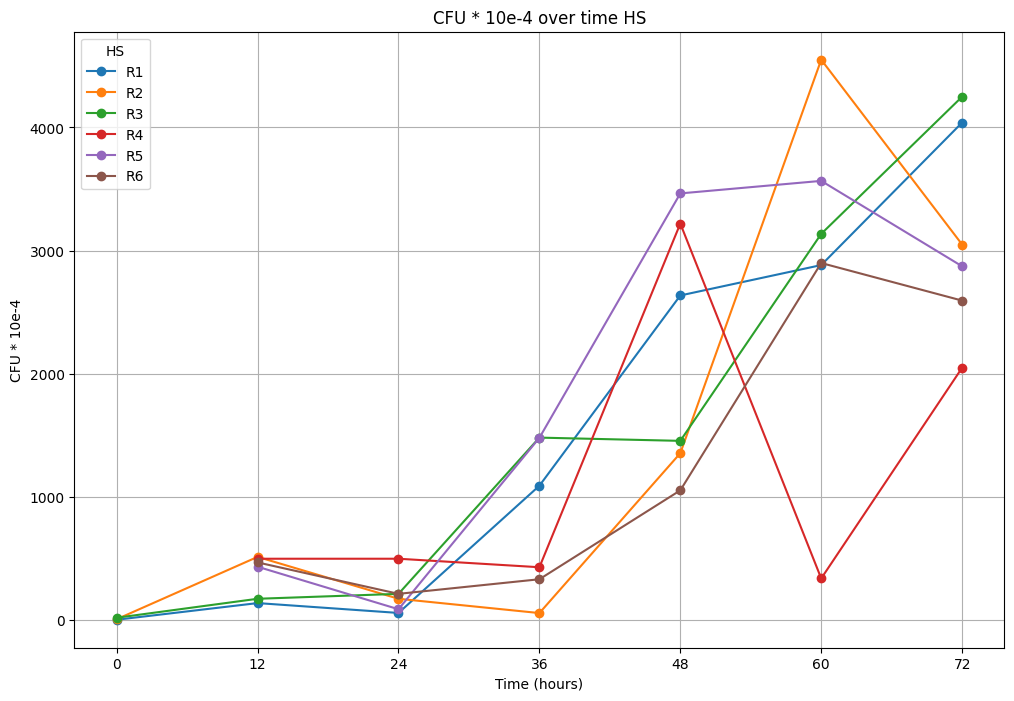

In [20]:
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt

# Paste your data as a string
data = '''HS     0   12   24           36           48           60           72
0  R1   5.0  140   60  1092.666667  2636.666667  2883.333333  4040.000000
1  R2   9.0  515  175    59.000000  1356.666667  4550.000000  3050.000000
2  R3  21.0  175  215  1483.000000  1456.666667  3136.666667  4250.000000
3  R4   NaN  500  500   431.000000  3220.000000   340.000000  2050.000000
4  R5   NaN  435   90  1481.333333  3465.000000  3566.666667  2873.333333
5  R6   NaN  470  215   333.500000  1055.000000  2900.000000  2595.000000'''

# Clean and read data
cleaned_data = data.replace(",", "")
data_io = StringIO(cleaned_data)
df = pd.read_csv(data_io, delim_whitespace=True, index_col=1)

# Plot
plt.figure(figsize=(12, 8))
for idx, row in df.iterrows():
    plt.plot(df.columns[1:], row[1:], marker='o', label=idx)
plt.xlabel('Time (hours)')
plt.ylabel('CFU * 10e-4')
plt.title('CFU * 10e-4 over time HS')
plt.legend(title='HS')
plt.grid(True)
plt.savefig("HS_allreplicates.png")
plt.show()



<ipython-input-21-94c1374a8803>:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(data_io, delim_whitespace=True, index_col=1)


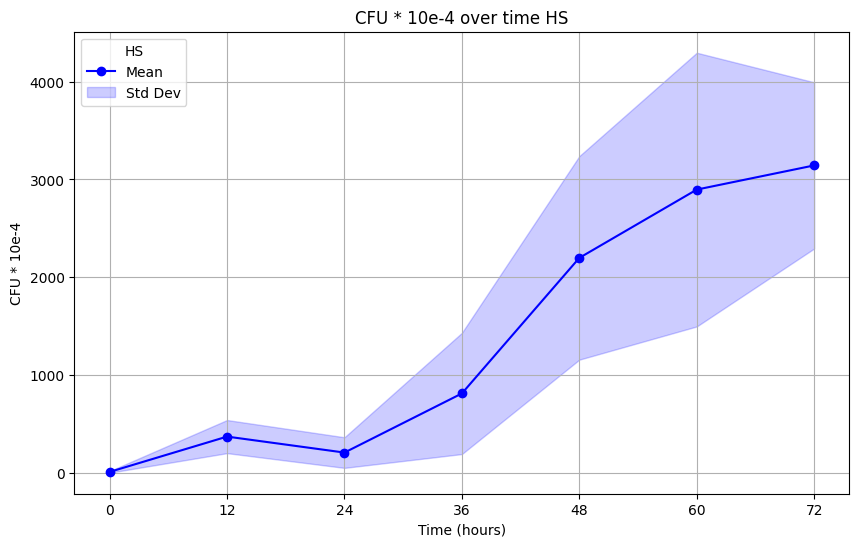

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# HS dataset as a string
data = '''HS     0   12   24           36           48           60           72
0  R1   5.0  140   60  1092.666667  2636.666667  2883.333333  4040.000000
1  R2   9.0  515  175    59.000000  1356.666667  4550.000000  3050.000000
2  R3  21.0  175  215  1483.000000  1456.666667  3136.666667  4250.000000
3  R4   NaN  500  500   431.000000  3220.000000   340.000000  2050.000000
4  R5   NaN  435   90  1481.333333  3465.000000  3566.666667  2873.333333
5  R6   NaN  470  215   333.500000  1055.000000  2900.000000  2595.000000'''

# Clean and load the data
cleaned_data = data.replace(",", "")
data_io = StringIO(cleaned_data)
df = pd.read_csv(data_io, delim_whitespace=True, index_col=1)
df = df.drop(columns=['HS'])  # Drop the index column if not needed

# Convert all data to numeric, ignore errors
df = df.apply(pd.to_numeric, errors='coerce')

# Calculate mean and standard deviation across replicates
mean_vals = df.mean(axis=0)
std_vals = df.std(axis=0)

# Plot mean ± std
plt.figure(figsize=(10, 6))
plt.plot(mean_vals.index, mean_vals.values, marker='o', color='b', label='Mean')
plt.fill_between(mean_vals.index, mean_vals - std_vals, mean_vals + std_vals,
                 color='b', alpha=0.2, label='Std Dev')
plt.xlabel('Time (hours)')
plt.ylabel('CFU * 10e-4')
plt.title('CFU * 10e-4 over time HS')
plt.legend(title='HS')
plt.grid(True)
plt.savefig("HS_allreplicates_mean_sd.png")
plt.show()


<ipython-input-23-534ff6e3db79>:26: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(StringIO(cleaned), delim_whitespace=True, index_col=1)
<ipython-input-23-534ff6e3db79>:26: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(StringIO(cleaned), delim_whitespace=True, index_col=1)


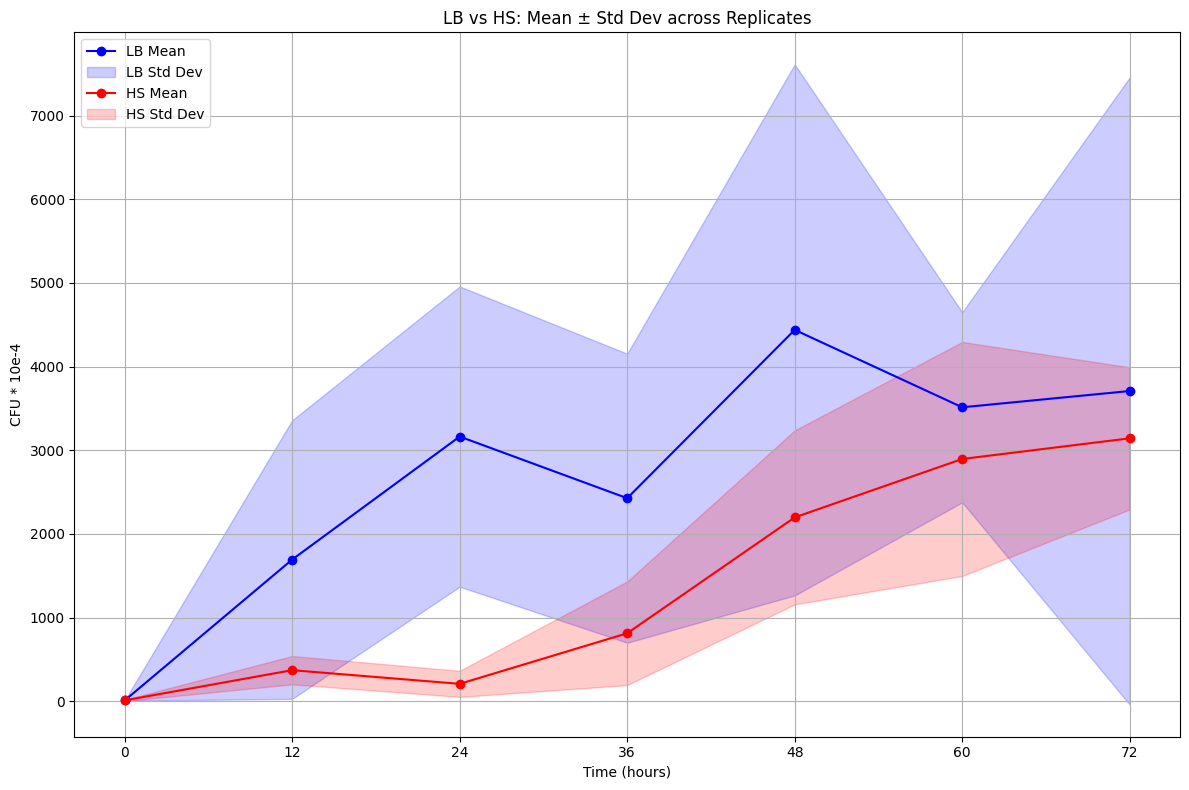

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# LB dataset as a string
lb_data = '''LB     0        12        24        36         48        60         72
0  R1  13.0    750.00  5,865.00  5,380.00  10,133.33  3,850.00   2,300.00
1  R2   9.0    635.00  2,580.00  3,596.67   2,300.00  2,300.00   2,950.00
2  R3   9.0  4,920.00  4,220.00  1,916.67   3,500.00  3,000.00   3,100.00
3  R4   NaN    500.00    500.00    860.00   5,233.33  4,433.33   1,150.00
4  R5   NaN  1,750.00  2,670.00  1,300.00   1,000.00  2,400.00  11,200.00
5  R6   NaN  1,610.00  3,150.00  1,510.00   4,466.67  5,100.00   1,550.00'''

# HS dataset as a string
hs_data = '''HS     0   12   24           36           48           60           72
0  R1   5.0  140   60  1092.666667  2636.666667  2883.333333  4040.000000
1  R2   9.0  515  175    59.000000  1356.666667  4550.000000  3050.000000
2  R3  21.0  175  215  1483.000000  1456.666667  3136.666667  4250.000000
3  R4   NaN  500  500   431.000000  3220.000000   340.000000  2050.000000
4  R5   NaN  435   90  1481.333333  3465.000000  3566.666667  2873.333333
5  R6   NaN  470  215   333.500000  1055.000000  2900.000000  2595.000000'''

# Helper function to load and process data
def process_data(data_str, drop_col):
    cleaned = data_str.replace(",", "")
    df = pd.read_csv(StringIO(cleaned), delim_whitespace=True, index_col=1)
    df = df.drop(columns=[drop_col])
    df = df.apply(pd.to_numeric, errors='coerce')
    return df

# Process both datasets
lb_df = process_data(lb_data, 'LB')
hs_df = process_data(hs_data, 'HS')

# Calculate means and std devs
lb_mean, lb_std = lb_df.mean(axis=0), lb_df.std(axis=0)
hs_mean, hs_std = hs_df.mean(axis=0), hs_df.std(axis=0)

# Plot
plt.figure(figsize=(12, 8))
plt.plot(lb_mean.index, lb_mean.values, marker='o', color='blue', label='LB Mean')
plt.fill_between(lb_mean.index, lb_mean - lb_std, lb_mean + lb_std, color='blue', alpha=0.2, label='LB Std Dev')
plt.plot(hs_mean.index, hs_mean.values, marker='o', color='red', label='HS Mean')
plt.fill_between(hs_mean.index, hs_mean - hs_std, hs_mean + hs_std, color='red', alpha=0.2, label='HS Std Dev')
plt.xlabel('Time (hours)')
plt.ylabel('CFU * 10e-4')
plt.title('LB vs HS: Mean ± Std Dev across Replicates')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('LB_HS_combined_plot_Mean ± Std Dev.png')
plt.show()

